### 2018년 ~ 2020년도 시계열 분석

In [1]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
%matplotlib inline 
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령


In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [3]:
hospital_2018= pd.read_csv('hospital_2018.csv')
hospital_2019= pd.read_csv('hospital_2019.csv')
hospital_2020= pd.read_csv('hospital_2020.csv')

In [4]:
all=pd.concat([hospital_2018,hospital_2019,hospital_2020])

In [5]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 365
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ACCOUNTDATE  1096 non-null   object
 1   CNT          1096 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.7+ KB


In [6]:
train=all[(all['ACCOUNTDATE']>='2018-01-01')&(all['ACCOUNTDATE']<='2020-10-31')]
test=all[(all['ACCOUNTDATE']>='2020-11-01')&(all['ACCOUNTDATE']<='2020-12-31')]

In [7]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [8]:
train.columns=['ds','y']
test.columns=['ds','y']

In [9]:
train['ds']= pd.to_datetime(train['ds'])

In [10]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,  #일단위의 경향성을 예측할 것이다.(년단위면 yearly_seasonality)
                 changepoint_prior_scale=0.5)
prophet.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 305 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      61 non-null     object
 1   y       61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


- test개수 만큼을 예축해야 하므로 61개를 예측하고자 합니다.

In [12]:
future_data = prophet.make_future_dataframe(periods = 61, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(61)

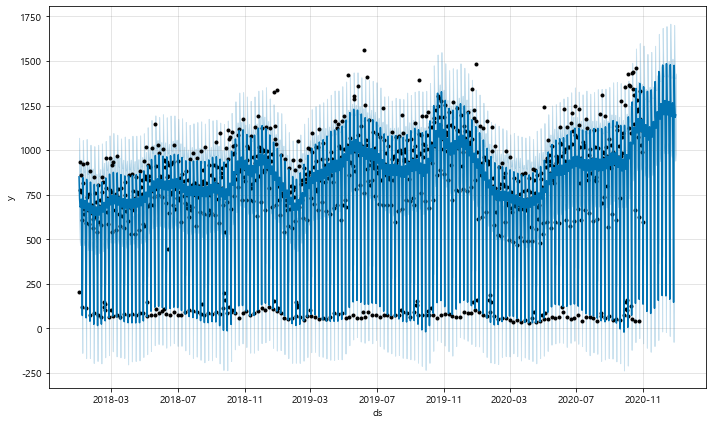

In [13]:
fig1=prophet.plot(forecast_data)

In [14]:
pred_y=a.yhat.values[0:61]
test_y=test.y.values[0:61]

In [15]:
pred_y

array([ 136.40291299, 1355.34693672, 1153.07924137, 1078.28905614,
       1086.09795349, 1142.47137069,  819.30818591,   95.86741286,
       1329.98407636, 1128.40823567, 1056.49315679, 1068.77837836,
       1130.75382031,  809.61220145,   84.28515871, 1337.68633277,
       1140.14552112, 1073.62747936, 1092.05588975, 1160.43045457,
        841.24210211,  113.11803593, 1384.09111371, 1188.12782078,
       1123.87603726, 1144.72793903, 1215.28785161,  893.4478255 ,
        157.63906323, 1441.12497116, 1241.62032907, 1174.5654586 ,
       1192.92561241, 1261.00732099,  932.1922969 ,  184.79347065,
       1477.37025331, 1271.43777532, 1199.2666825 , 1213.41860255,
       1277.91093677,  941.6093989 ,  182.68930164, 1484.97398263,
       1273.73534277, 1198.0207397 , 1209.92619712, 1273.11145547,
        931.85305856,  164.11285227, 1478.90153394, 1265.17239985,
       1188.67714995, 1200.97851578, 1265.31707123,  921.3261618 ,
        146.7086792 , 1475.62654826, 1260.68823691, 1184.33376

## 2020년 11월1일부터 12월31일예측

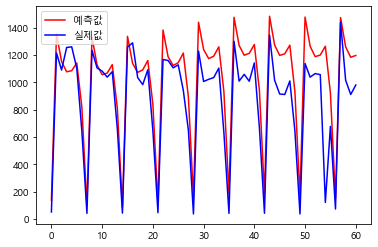

In [16]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()

- 중간에 급격하게 내려가는 값들은 공휴일이나 크리스마스가 껴있어 예측의 성능이 좋지 않습니다.

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y) #평균 절대 오차(MAE) 는 모든 절대 오차의 평균

169.56742683913052

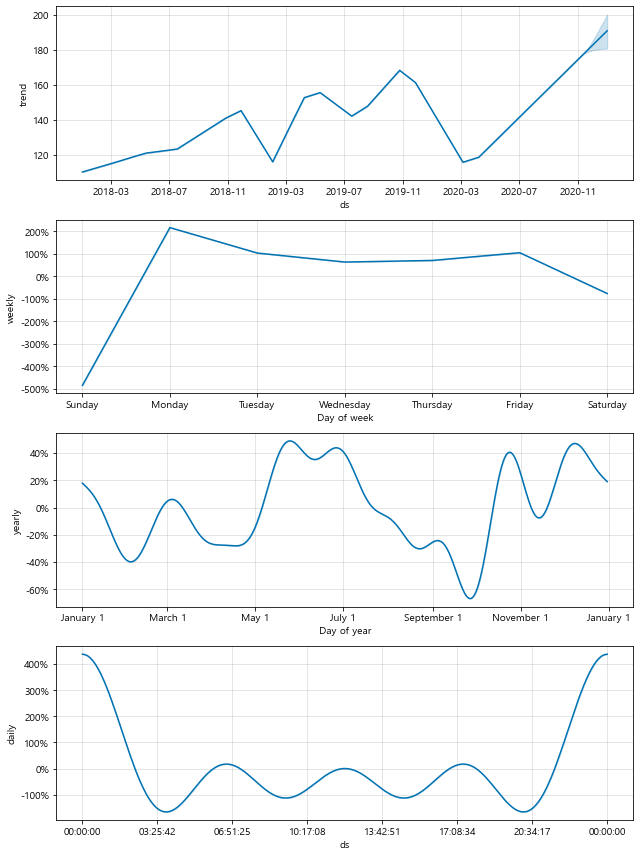

In [18]:
fig2=prophet.plot_components(forecast_data)

# 일요일 제거 한 후

In [16]:
number1 = int(input("해당 숫자의 배수를 구하기 : "))
# 예를들어 3의 배수를 1부터 ~ 999까지 뽑아낸다고 가정합니다.


set1 = [] # number1에서 3의 배수를 추출한 리스트를 저장하는 곳
for i in range(1,365):
    if (i) % number1 == 0:
        set1.append(i+305)


print(set1)


해당 숫자의 배수를 구하기 : 7
[312, 319, 326, 333, 340, 347, 354, 361, 368, 375, 382, 389, 396, 403, 410, 417, 424, 431, 438, 445, 452, 459, 466, 473, 480, 487, 494, 501, 508, 515, 522, 529, 536, 543, 550, 557, 564, 571, 578, 585, 592, 599, 606, 613, 620, 627, 634, 641, 648, 655, 662, 669]


In [3]:
hospital_2018= pd.read_csv('hospital_2018.csv')
hospital_2019= pd.read_csv('hospital_2019.csv')
hospital_2020= pd.read_csv('hospital_2020.csv')

In [21]:
hospital_2018=hospital_2018.drop([6, 13, 20, 27, 34, 41, 48, 55, 62, 69,
                    76, 83, 90, 97, 104, 111, 118, 125, 132, 139,
                    146, 153, 160, 167, 174, 181, 188, 195, 202, 209, 216, 223, 230, 237, 244,
                    251, 258, 265, 272, 279, 286, 293, 300, 307, 314, 321, 328, 335, 342, 349, 356, 363])

In [22]:
hospital_2019=hospital_2019.drop([5, 12, 19, 26, 33, 40, 47, 54, 61, 68, 75,
                    82, 89, 96, 103, 110, 117, 124, 131, 138, 145, 152, 159, 166, 173, 180, 187, 194, 201, 208, 215, 222, 229, 
                    236, 243, 250, 257, 264, 271, 278, 285, 292, 299, 306, 313, 320, 327, 334, 341, 348, 355, 362])

In [23]:
hospital_2020=hospital_2020.drop([4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95,
                    102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200, 207, 214, 221, 228, 235, 242,
                    249, 256, 263, 270, 277, 284, 291, 298, 305, 312, 319, 326, 333, 340, 347, 354, 361])

In [4]:
all=pd.concat([hospital_2018,hospital_2019,hospital_2020])

In [5]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 365
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ACCOUNTDATE  1096 non-null   object
 1   CNT          1096 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.7+ KB


In [6]:
train=all[(all['ACCOUNTDATE']>='2018-01-01')&(all['ACCOUNTDATE']<='2020-10-31')]
test=all[(all['ACCOUNTDATE']>='2020-11-01')&(all['ACCOUNTDATE']<='2020-12-31')]

In [7]:
train.columns=['ds','y']
test.columns=['ds','y']

In [8]:
train['ds']= pd.to_datetime(train['ds'])

In [9]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [10]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,  #일단위의 경향성을 예측할 것이다.(년단위면 yearly_seasonality)
                 changepoint_prior_scale=0.5)
prophet.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [11]:
future_data = prophet.make_future_dataframe(periods = 61, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(60)

### 예측을 주말도 함께 한거라 60일 중 8개의 일요일을 제거하는 작업

In [14]:
a=a.drop([1042, 1049, 1056, 1063, 1070, 1077, 1084, 1091]) #예측한 60개에 데이터에는 일요일이 포함되어 있어 제거하는 작업
#923, 930, 937, 944

In [17]:
test=test.drop([312, 319, 326, 333, 340, 347, 354, 361])

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 305 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      53 non-null     object
 1   y       53 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [34]:
pred_y=a.yhat.values[0:52]
test_y=test.y.values[1:53]

## 2020년 11월1일부터 12월31일예측 (일요일 제거한 것)

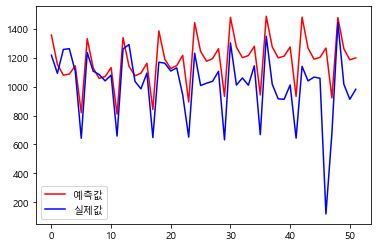

In [36]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()
#크리스마스라는 공휴일때문에 예측의 정확성이 내려간 것으로 보임

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y) #평균 절대 오차(MAE) 는 모든 절대 오차의 평균

182.48069518659838

- 실제값 오른쪽에 내려가는 값은 크리스마스 때문에 

## 일요일 제거한 후 토요일 조정한 것

- 아래는 토요일 일요일 전체 다 제거한 것

In [60]:
hospital_2018= pd.read_csv('hospital_2018.csv')
hospital_2019= pd.read_csv('hospital_2019.csv')
hospital_2020= pd.read_csv('hospital_2020.csv')

In [143]:
hospital_2018=hospital_2018.drop([6, 13, 20, 27, 34, 41, 48, 55, 62, 69,
                    76, 83, 90, 97, 104, 111, 118, 125, 132, 139,
                    146, 153, 160, 167, 174, 181, 188, 195, 202, 209, 216, 223, 230, 237, 244,
                    251, 258, 265, 272, 279, 286, 293, 300, 307, 314, 321, 328, 335, 342, 349, 356, 363,5, 12, 19, 26, 33, 40, 47, 54, 61, 68, 75,
                    82, 89, 96, 103, 110, 117, 124, 131, 138, 145, 152, 159, 166, 173, 180, 187, 194, 201, 208, 215, 222, 229, 
                    236, 243, 250, 257, 264, 271, 278, 285, 292, 299, 306, 313, 320, 327, 334, 341, 348, 355, 362])

In [145]:
hospital_2019=hospital_2019.drop([5, 12, 19, 26, 33, 40, 47, 54, 61, 68, 75,
                    82, 89, 96, 103, 110, 117, 124, 131, 138, 145, 152, 159, 166, 173, 180, 187, 194, 201, 208, 215, 222, 229, 
                    236, 243, 250, 257, 264, 271, 278, 285, 292, 299, 306, 313, 320, 327, 334, 341, 348, 355, 362,4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95,
                    102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200, 207, 214, 221, 228, 235, 242,
                    249, 256, 263, 270, 277, 284, 291, 298, 305, 312, 319, 326, 333, 340, 347, 354, 361])

In [146]:
hospital_2020=hospital_2020.drop([4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95,
                    102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200, 207, 214, 221, 228, 235, 242,
                    249, 256, 263, 270, 277, 284, 291, 298, 305, 312, 319, 326, 333, 340, 347, 354, 361,3, 10, 17, 24, 31, 38, 45, 52,
                                  59, 66, 73, 80, 87, 94, 101, 108, 115, 122, 129, 136, 143, 150, 157, 164, 171, 178, 185, 192, 199, 206, 213, 220, 227,
                                  234, 241, 248, 255, 262, 269, 276, 283, 290, 297, 304, 311, 318, 325, 332, 339, 346, 353, 360])

In [61]:
hospital_2018=hospital_2018.drop([6, 13, 20, 27, 34, 41, 48, 55, 62, 69,76, 83, 90, 97, 104, 111, 118, 125, 132, 139,146,
                                  153, 160, 167, 174, 181, 188, 195, 202, 209, 216, 223, 230, 237, 244,
                                  251, 258, 265, 272, 279, 286, 293, 300, 307, 314, 321, 328, 335, 342, 349, 356, 363])
hospital_2019=hospital_2019.drop([6, 13, 20, 27, 34, 41, 48, 55, 62, 69,76, 83, 90, 97, 104, 111, 118, 125, 132, 139,
                                  146, 153, 160, 167, 174, 181, 188, 195, 202, 209, 216, 223, 230, 237, 244,
                                  251, 258, 265, 272, 279, 286, 293, 300, 307, 314, 321, 328, 335, 342, 349, 356, 363])
hospital_2020=hospital_2020.drop([4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95,
                                  102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200, 207, 214, 221, 228, 235, 242,
                                  249, 256, 263, 270, 277, 284, 291, 298, 305, 312, 319, 326, 333, 340, 347, 354, 361])

In [54]:
all=pd.concat([hospital_2018,hospital_2019,hospital_2020])

In [53]:
all.mean() #토,일 제외한 값들의 평균

CNT    802.02766
dtype: float64

In [154]:
all.mean() #일요일만 제거한 값들의 평균

CNT    858.979787
dtype: float64

In [62]:
hospital_2018['index1'] = hospital_2018.index
hospital_2019['index1'] = hospital_2019.index
hospital_2020['index1'] = hospital_2020.index

In [63]:
prod_list =  [5, 12, 19, 26, 33, 40, 47, 54, 61, 68, 75,82, 89, 96, 103, 110, 117,
              124, 131, 138, 145, 152, 159, 166, 173, 180, 187, 194, 201, 208, 215,
              222, 229, 236, 243, 250, 257, 264, 271, 278, 285, 292, 299, 306, 313, 320, 327, 334, 341, 348, 355, 362]
hospital_2018.loc[hospital_2018['index1'].isin(prod_list), 'CNT'] *= 1.411

In [64]:
prod_list =  [4, 11, 18, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95,
              102, 109, 116, 123, 130, 137, 144, 151, 158, 165, 172, 179, 186, 193, 200, 207, 214, 221, 228, 235, 242,
              249, 256, 263, 270, 277, 284, 291, 298, 305, 312, 319, 326, 333, 340, 347, 354, 361]
hospital_2019.loc[hospital_2019['index1'].isin(prod_list), 'CNT'] *= 1.411

In [65]:
prod_list =  [3, 10, 17, 24, 31, 38, 45, 52,59, 66, 73, 80, 87, 94, 101,
              108, 115, 122, 129, 136, 143, 150, 157, 164, 171, 178, 185, 192, 199, 206, 213, 220, 227,
              234, 241, 248, 255, 262, 269, 276, 283, 290, 297, 304, 311, 318, 325, 332, 339, 346, 353, 360]
hospital_2020.loc[hospital_2020['index1'].isin(prod_list), 'CNT'] *= 1.411

In [66]:
all=pd.concat([hospital_2018,hospital_2019,hospital_2020])

In [67]:
all.mean()

CNT       845.564365
index1    181.890426
dtype: float64

In [68]:
all=all.loc[:,['ACCOUNTDATE','CNT']].copy()

In [69]:
train=all[(all['ACCOUNTDATE']>='2018-01-01')&(all['ACCOUNTDATE']<='2020-10-31')]
test=all[(all['ACCOUNTDATE']>='2020-11-01')&(all['ACCOUNTDATE']<='2020-12-31')]

In [70]:
train.columns=['ds','y']
test.columns=['ds','y']

In [71]:
train['ds']= pd.to_datetime(train['ds'])

In [72]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,  #일단위의 경향성을 예측할 것이다.(년단위면 yearly_seasonality)
                 changepoint_prior_scale=0.5)
prophet.fit(train)

In [73]:
future_data = prophet.make_future_dataframe(periods = 61, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(60)

In [74]:
test=test.drop([359])

In [76]:
a=a.drop([942])

In [77]:
a=a.drop([895, 902, 909, 916, 923, 930, 937, 944])

In [78]:
pred_y=a.yhat.values[0:51]
test_y=test.y.values[0:51]

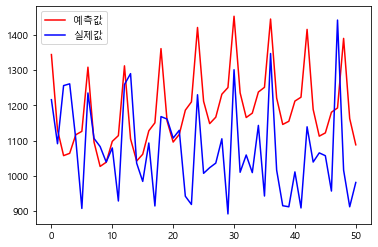

In [79]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y)

151.24904463768172

## 크리스마스를 제거한 것

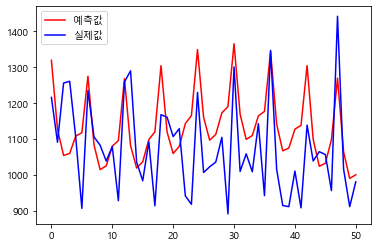

In [79]:
plt.plot(pred_y,color='red',label='예측값') #에측값
plt.plot(test_y,color='blue',label='실제값') #실제값
plt.legend()

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
mean_absolute_error(pred_y,test_y)

102.78365832105948